<a href="https://colab.research.google.com/github/Viraj-Gadade/Arrhythmia-Detection/blob/main/Arrhythmia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/mitbih_train.csv")
df.shape

(87553, 188)

In [ ]:
a=df.iloc[::,:187]

In [ ]:
a.shape

(87553, 187)

In [ ]:
n=df.iloc[::,-1]
n.head()
n.shape

(87553,)

[72470 72471 72472 ... 74690 74691 74692]


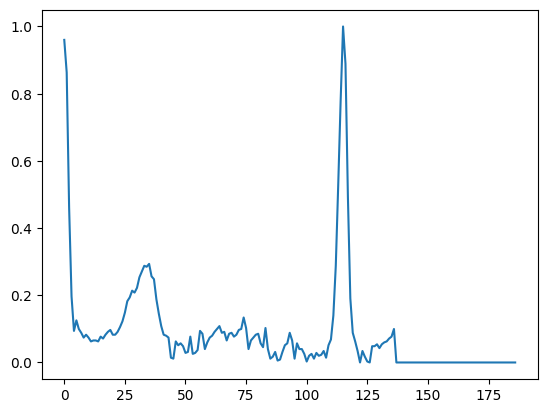

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n=np.array(n)
a=np.array(a)
ans=np.where(n==1)[0]
print(ans)
plt.plot(a[0,::])

Balanced Training label distribution: {np.int64(0): np.int64(15083), np.int64(1): np.int64(15083)}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


755/755 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8509 - loss: 0.3343 - val_accuracy: 0.9523 - val_loss: 0.1324
Epoch 2/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9471 - loss: 0.1471 - val_accuracy: 0.9549 - val_loss: 0.1222
Epoch 3/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9598 - loss: 0.1105 - val_accuracy: 0.9660 - val_loss: 0.1037
Epoch 4/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9693 - loss: 0.0864 - val_accuracy: 0.9677 - val_loss: 0.0930
Epoch 5/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9737 - loss: 0.0726 - val_accuracy: 0.9683 - val_loss: 0.0900
Epoch 6/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0626 - val_accuracy: 0.9713 - val_loss: 0.0797
Epoch 7/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9797 - loss: 0.0530 - val_accuracy: 0.9735 - val_loss: 0.0842
Epoch 8/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9836 - loss: 0.0476 - val_accuracy: 0.9717 - val

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


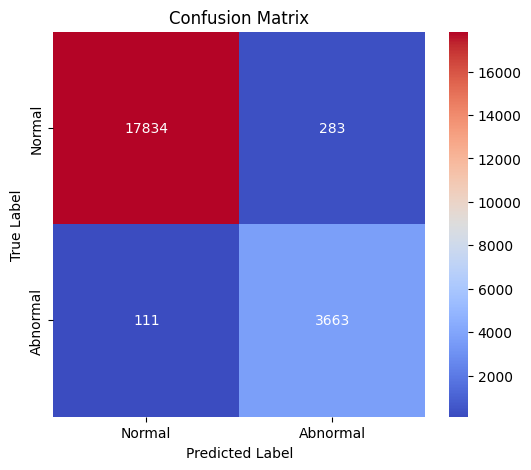

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     18117
           1       0.93      0.97      0.95      3774

    accuracy                           0.98     21891
   macro avg       0.96      0.98      0.97     21891
weighted avg       0.98      0.98      0.98     21891



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# Load training dataset
train_df = pd.read_csv("/content/mitbih_train.csv")
test_df = pd.read_csv("/content/mitbih_test.csv")

# Separate features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Convert labels: 0 → Normal (0), others (1,2,3,4) → Abnormal (1)
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)

# Separate Normal & Abnormal samples
normal_indices = np.where(y_train == 0)[0]
abnormal_indices = np.where(y_train == 1)[0]

# Select equal number of samples from both classes
min_samples = min(len(normal_indices), len(abnormal_indices))
selected_normal = np.random.choice(normal_indices, min_samples, replace=False)
selected_abnormal = np.random.choice(abnormal_indices, min_samples, replace=False)

# Combine and shuffle the selected data
balanced_indices = np.concatenate([selected_normal, selected_abnormal])
np.random.shuffle(balanced_indices)

X_train_balanced = X_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

# Check new class distribution
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Balanced Training label distribution:", dict(zip(unique, counts)))

# Normalize features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Reshape for CNN input
X_train_balanced = X_train_balanced.reshape(X_train_balanced.shape[0], X_train_balanced.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding="same", input_shape=(X_train_balanced.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_split=0.2)

# Save model
model.save("balanced_arrhythmia_cnn.h5")

# Load the best model (optional)
model = load_model("balanced_arrhythmia_cnn.h5")

# Evaluate on test dataset
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

685/685 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step


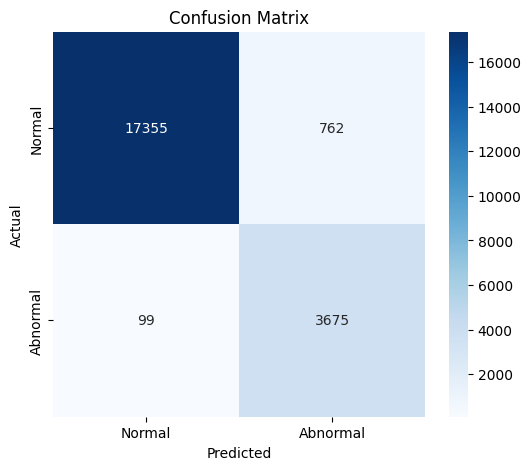

Classification Report:
               precision    recall  f1-score   support

           0     0.9943    0.9579    0.9758     18117
           1     0.8283    0.9738    0.8951      3774

    accuracy                         0.9607     21891
   macro avg     0.9113    0.9659    0.9355     21891
weighted avg     0.9657    0.9607    0.9619     21891

Accuracy: 0.9607
Precision: 0.8283
Recall: 0.9738


In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the trained model
model = tf.keras.models.load_model("/content/balanced_arrhythmia_cnn.h5")

# Load test dataset
test_data = pd.read_csv("/content/mitbih_test.csv")

# Extract features and labels
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Convert labels to binary (0 = Normal, 1 = Abnormal)
y_test = np.where(y_test == 0, 0, 1)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Reshape data for CNN input
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict using the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Compute precision, recall, and accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the computed metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the trained model
model = tf.keras.models.load_model("/content/balanced_arrhythmia_cnn.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: Abnormal


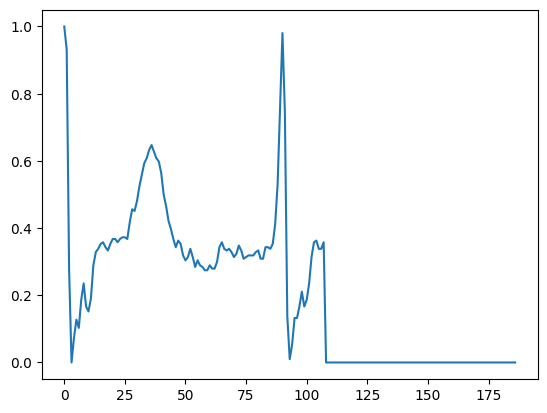

In [ ]:
test = pd.read_csv("/content/mitbih_test.csv")
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
X_test = np.array(X_test)
y_test = np.array(y_test)

abnormal = np.where(y_test == 1)[0]
plt.plot(X_test[abnormal[40]])

# Apply StandardScaler to the full dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

abnormal = np.where(y_test == 1)[0]
single_row = X_test[abnormal[40]].reshape(1, X_test.shape[1], 1)  # Reshape to (1, num_features, 1)


# Predict using the model for this single row
single_prediction = (model.predict(single_row) > 0.5).astype(int)

# Print the prediction result
if single_prediction == 0:
    print("Prediction: Normal")
else:
    print("Prediction: Abnormal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Normal


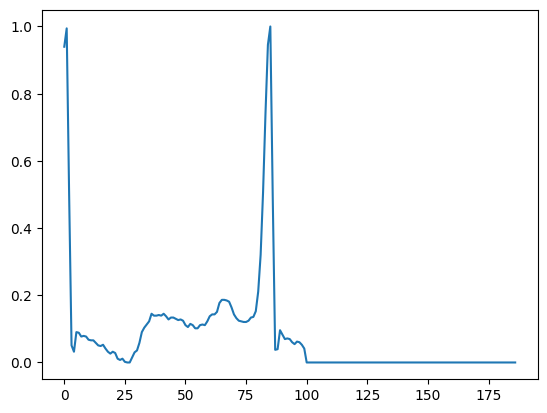

In [ ]:
#For Normal sample
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
X_test = np.array(X_test)
y_test = np.array(y_test)

normal = np.where(y_test == 0)[0]
plt.plot(X_test[normal[25]])

# Apply StandardScaler to the full dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Identify an normal sample
normal = np.where(y_test == 0)[0]
single_row = X_test[normal[25]].reshape(1, X_test.shape[1], 1)  # Reshape to (1, num_features, 1)


# Predict using the model for this single row
single_prediction = (model.predict(single_row) > 0.5).astype(int)

# Print the prediction result
if single_prediction == 0:
    print("Prediction: Normal")
else:
    print("Prediction: Abnormal")